In [2]:
import msprime
from IPython.display import SVG, display
  
    
L = 3_0_000_000
N = 20 # number of intevals in the past

ts = msprime.sim_ancestry(
    samples=1,
    recombination_rate=1e-8,
    sequence_length=L,
    population_size=10_000,
    # ploidy=2,
    model="hudson",
    random_seed=42)

mutated_ts = msprime.sim_mutations(ts, rate=1e-8, random_seed=54321)

times = [0]*L
mutations = [0]*L
prior_dist = [0.0]*N

def simple_split(time: float, split_const: int = 5000) -> int:
    return int(min(time//split_const, N-1))


splitter = simple_split

for m in mutated_ts.mutations():
    mutations[int(m.position)] = 1
    
for t in mutated_ts.aslist():
    interval = t.get_interval()
    left = interval.left
    right = interval.right
    time = t.get_total_branch_length()/2
    times[int(left):int(right)] = [time]*int(right-left)
    prior_dist[splitter(time)] += (int(right-left))/L

In [15]:
123//25

4

In [4]:
a = [0,0,0,0,0]
a[1:3] = [1,1]

In [16]:
ts = msprime.sim_ancestry(
    samples=1,
    recombination_rate=1e-8,
    sequence_length=5_000,
    population_size=10_000,
    # ploidy=2,
    model="hudson",
    num_replicates=2,
    random_seed=42)

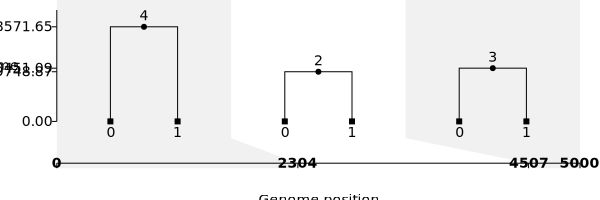

In [17]:
t = next(ts)
SVG(t.draw_svg(y_axis=True))

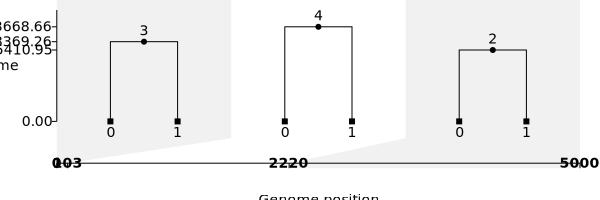

In [18]:
t = next(ts)
SVG(t.draw_svg(y_axis=True))

In [19]:
import msprime
from IPython.display import SVG, display
  
    
L = 3_0_000_000
N = 20 # number of intevals in the past

### specify demography ###

demography = msprime.Demography()
demography.add_population(name="A", initial_size=10_000)
demography.add_population_parameters_change(2_000, initial_size =2_000)
demography.add_population_parameters_change(10_000, initial_size = 10_000)

### ####
ts = msprime.sim_ancestry(
    samples=1,
    recombination_rate=1e-8,
    sequence_length=L,
    # population_size=10_000,
    demography=demography,
    # ploidy=2,
    model="hudson",
    random_seed=42)

mutated_ts = msprime.sim_mutations(ts, rate=1e-8, random_seed=54321)

times = [0]*L
mutations = [0]*L
prior_dist = [0.0]*N

def simple_split(time: float, split_const: int = 5000) -> int:
    return int(min(time//split_const, N-1))


splitter = simple_split

for m in mutated_ts.mutations():
    mutations[int(m.position)] = 1
    
for t in mutated_ts.aslist():
    interval = t.get_interval()
    left = interval.left
    right = interval.right
    time = t.get_total_branch_length()/2
    times[int(left):int(right)] = [time]*int(right-left)
    prior_dist[splitter(time)] += (int(right-left))/L

In [21]:
prior_dist

[0.5545362666666668,
 0.31501256666666644,
 0.028784233333333336,
 0.02352593333333333,
 0.01958920000000001,
 0.015370333333333335,
 0.008557166666666668,
 0.0060410333333333335,
 0.007455533333333337,
 0.0047807,
 0.0033809333333333336,
 0.0032503333333333325,
 0.0011061333333333336,
 0.0019578666666666663,
 0.0009477999999999998,
 0.0012390000000000003,
 0.0008481666666666666,
 0.0009957666666666667,
 0.0002895666666666667,
 0.002331466666666667]

In [67]:
### specify demography ###
demography = msprime.Demography()
demography.add_population(name="A", initial_size=10_000)
demography.add_population_parameters_change(2_000, initial_size =2_000)
demography.add_population_parameters_change(10_000, initial_size = 10_000)

demography.debug()

,start,end,growth_rate
A,10000.0,10000.0,0
time,type,parameters,effect
2000,Population parameter change,"population=-1, initial_size=2000",initial_size → 2e+03 for all populations
,start,end,growth_rate
A,2000.0,2000.0,0
time,type,parameters,effect
1e+04,Population parameter change,"population=-1, initial_size=10000",initial_size → 1e+04 for all populations
,start,end,growth_rate
A,10000.0,10000.0,0


In [90]:
# random demography generator

import numpy as np

NUMBER_OF_EVENTS_LIMITS = (1, 20)
LAMBDA_EXP = 20_000

POPULATION = 10_000
POPULATION_COEFF_LIMITS = (0.5, 1.5) 
MIN_POPULATION_NUM = 1_000

def generate_demographic_events(population: int = POPULATION):
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=population)
    
    number_of_events = np.random.randint(*NUMBER_OF_EVENTS_LIMITS)

    times = sorted(np.random.exponential(LAMBDA_EXP, size=number_of_events))
    
    
         
    last_population_size = population
    for t in times:
        last_population_size = max(last_population_size * np.random.uniform(*POPULATION_COEFF_LIMITS),
                                   MIN_POPULATION_NUM)
        demography.add_population_parameters_change(t, initial_size=last_population_size)
    
    
    # print(f"Number of random events: {number_of_events}")
    # print(f"Times of random events: {times}")
    
    
    ### REWRITE ###
    

    
    """
    population_sizes = np.array(np.random.uniform(0.2, 1.2, size=number_of_events)*population,dtype=int)
    
    for t, s in zip(times, population_sizes):
        # now it is demography.add_population_parameters_change
        events.append(
            msprime.PopulationParametersChange(t, s)
        )
    """
    ### END ###
    return demography

In [91]:
random_demography = generate_demographic_events()
random_demography.debug()

,start,end,growth_rate
A,10000.0,10000.0,0
time,type,parameters,effect
2321,Population parameter change,"population=-1, initial_size=12799.500073854704",initial_size → 1.3e+04 for all populations
,start,end,growth_rate
A,12799.5,12799.5,0
time,type,parameters,effect
5127,Population parameter change,"population=-1, initial_size=7477.971987373931",initial_size → 7.5e+03 for all populations
,start,end,growth_rate
A,7478.0,7478.0,0
time,type,parameters,effect


In [84]:
np.random.randint(*(0,1))

0

In [87]:
print((0,1))

(0, 1)


In [92]:
1.6*10e-8 > 1.6*10e-10

True